In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')  # To ignore all thee warnings in this notebook.

### Section 1 - Load and Visualise the Data
- Download (Already downloaded)
- Load 
- Visualise
- Normalisation

In [7]:
# Load
X = pd.read_csv('./Training Data/Linear_X_Train.csv')
y = pd.read_csv('./Training Data/Linear_Y_Train.csv')
X.head()

,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043


In [9]:
X.shape, y.shape

((3750, 1), (3750, 1))

In [10]:
# Convert X,Y to Numpy arrays
X = X.values
y = y.values

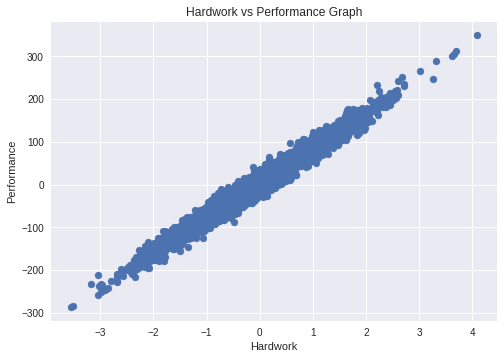

In [14]:
# Visualise
plt.style.use('seaborn')
plt.scatter(X,y)    # use scatte rplot to visualize the relation of X and y
plt.title("Hardwork vs Performance Graph")
plt.xlabel("Hardwork")
plt.ylabel("Performance")
plt.show()

In [15]:
# let us check the mean and std:
print(X.mean(), X.std())

-0.03779466168006854 0.9920801322508517


## Section 2 - Linear Regression Implementation

In [16]:
def hypothesis(x,theta):    # theta is a vector with 2 values [θ(0), θ(1)]
    y_ = theta[0] + theta[1]*x  # y_ means predicted value of y which is the equation given above
    return y_  # y_ is read as y cap

In [17]:
# like this we can create an emplty vector with 2rows and 1 column
x = np.zeros((2,))
print(x) 
print(x.shape)

[0. 0.]
(2,)


In [19]:
def gradient(X,Y,theta):  # X and Y are whole data X and actual Y
    m = X.shape[0]   # X.shape[0] is total no of elements in X
    grad = np.zeros((2,))   # create emplt vector to store gradients
    for i in range(m):
        x = X[i]  
        y_ = hypothesis(x,theta)   # predicted y at each point
        y = Y[i]    # actual y at each point
        grad[0] += (y_ - y)   # update gradients according to the above equations
        grad[1] += (y_ - y)*x
    return grad/m   # It will divide both grad[0] and grad[1] by m. See above img for explanation

In [21]:
def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0   # initialize total error as 0(in float)
    for i in range(m):
        y_ = hypothesis(X[i],theta)  # It gives predicted value of y
        total_error += (y_ - Y[i])**2  # add all the mena squared error
        
    return (total_error/m)  # divide mean squared sum by 'm'

In [25]:
def gradientDescent(X,Y,max_steps=100,learning_rate =0.1):
    
    theta = np.zeros((2,))  # initialize theta vector as 0 values for theta[0] and theta[1]
    error_list = []  # this list will store error in each step
    theta_list = []  # it stores improved values of theta in each step
    
    for i in range(max_steps):
        grad = gradient(X,Y,theta)  # compute gradient from gradient() function defined above
        e = error(X,Y,theta)  # find the error
        
        #Update theta according to gradient descent algo
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
        theta_list.append((theta[0],theta[1])) # store theta at each step
        error_list.append(e)  # store the error in each step
        
    return theta,error_list,theta_list

In [24]:
theta,error_list,theta_list = gradientDescent(X,y)

In [26]:
theta

array([ 3.72687896, 80.54086647])

In [27]:
y_pred = hypothesis(X[0], theta)
print(y_pred)

[-19.57419108]


- It gived us the predicted value of y_pred

<hr>

- We can also see how our error decreased in each step as we stored error and theta for each step in error_list and theta_list


In [28]:
error_list

[array([6576.35005246]),
 array([5382.10116306]),
 array([4411.49946152]),
 array([3622.60756627]),
 array([2981.36244807]),
 array([2460.09492819]),
 array([2036.32790862]),
 array([1691.80078718]),
 array([1411.67742971]),
 array([1183.90311642]),
 array([998.68240386]),
 array([848.05513558]),
 array([725.55212733]),
 array([625.91553452]),
 array([544.87173451]),
 array([478.94684832]),
 array([425.31688589]),
 array([381.68600791]),
 array([346.18762175]),
 array([317.30402305]),
 array([293.8011006]),
 array([274.67527734]),
 array([259.1103913]),
 array([246.44265199]),
 array([236.13215782]),
 array([227.7397446]),
 array([220.90816592]),
 array([215.34679392]),
 array([210.819181]),
 array([207.13294679]),
 array([204.13155518]),
 array([201.6876277]),
 array([199.69750573]),
 array([198.07682823]),
 array([196.75693483]),
 array([195.6819403]),
 array([194.80635471]),
 array([194.09314753]),
 array([193.51217265]),
 array([193.03888696]),
 array([192.65330781]),
 array([192.3

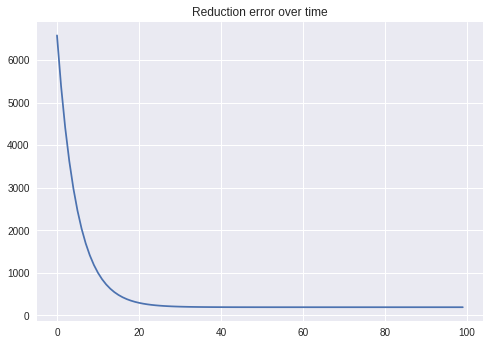

In [29]:
plt.plot(error_list)
plt.title("Reduction error over time")
plt.show()

In [30]:
def hypothesis(x,theta):
    y_ = theta[0] + theta[1]*x
    return y_

def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x,theta)  
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
    return grad/m

def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2
        
    return (total_error/m)
    

def gradientDescent(X,Y,max_steps=100,learning_rate =0.1):
    
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    
    for i in range(max_steps):
        
        # Compute grad
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)[0]
        
        
        #Update theta
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        # Storing the theta values during updates
        theta_list.append((theta[0],theta[1]))
        error_list.append(e)
        
    return theta,error_list,theta_list

### Section - 3 Predictions and Best Line

In [32]:
# pass whole X_test as argument and y_ is the list of outputs for all the x-values in X array
y_ = hypothesis(X,theta)   
print(y_)

[[-19.57419108]
 [-43.69635897]
 [ 86.48322254]
 ...
 [-20.85126634]
 [138.69991375]
 [-35.87967507]]


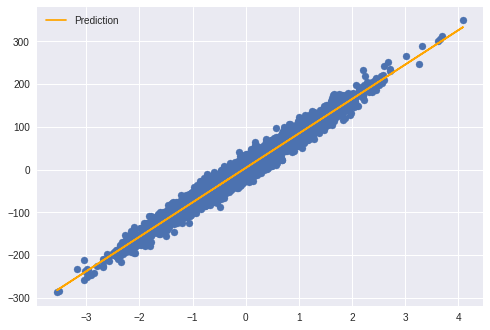

In [33]:
# Training + Predictions
plt.scatter(X,y)  # this is training data
plt.plot(X,y_,color='orange',label="Prediction")  # this is our predicted data for same X
plt.legend()
plt.show()

- Here we used scatter plot for original data and line plot for predicted data.

<hr>

## Let us do testing on our testing dataset

In [36]:
# Load the test data
X_test = pd.read_csv('./Test Cases/Linear_X_Test.csv').values  # this is test set
y_test = hypothesis(X_test,theta)  # this is our predicted output
X_test.shape, y_test.shape

((1250, 1), (1250, 1))

In [37]:
df = pd.DataFrame(data=y_test,columns=["y"])

In [38]:
df.to_csv('y_prediction.csv',index=False)

In [40]:
def r2_score(Y,Y_):   # Y is actual y and Y_ is predicted y
    # Instead of Loop, np.sum is recommended as it is fast
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y- Y.mean())**2)
    score = (1- num/denom)
    return score*100
    

In [41]:
r2_score(y,y_)

97.09612220841039

- Here we got 97% of accuracy.
- We can also check accuracy of programs done previously in knn algo

### Section - 5 Visualising Loss Function, Gradient Descent Trajectory, Theta Updates

In [42]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [43]:
theta

array([ 3.72687896, 80.54086647])

In [45]:
# Loss Actually 

# create dummy data for theta(0) and theta(1) centered around their actual values.
T0 = np.arange(-40,40,1)   
T1 = np.arange(40,120,1)

T0,T1 = np.meshgrid(T0,T1)   # It returns 2 arrays of size 80x80
J = np.zeros(T0.shape)      # create vector of size 80x80 to store loss function

# find the error using error function
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T1[i,j]*X + T0[i,j]    # this is hypothesis function to find predicted y
        J[i,j] = np.sum((y-y_)**2)/y.shape[0]  # this is error function

#print(J.shape)

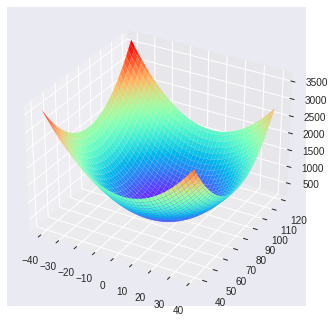

In [46]:
# Visualise the J (Loss)

fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')  # x=T0, y=T1, z=J which is function of T0, T1
plt.show()

- This is the visualization of above loss function.

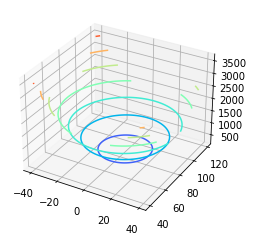

In [46]:
# Visualization of loss function using contour plot
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
plt.show()


###  Plot the changes in values of theta

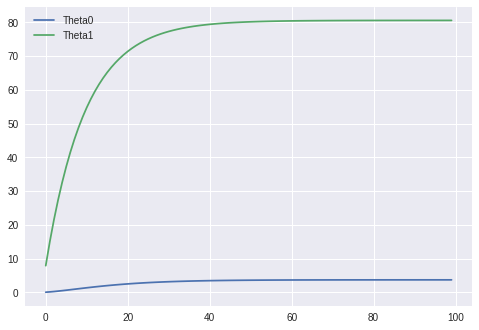

In [47]:
theta_list = np.array(theta_list)
plt.plot(theta_list[:,0],label="Theta0")
plt.plot(theta_list[:,1],label="Theta1")
plt.legend()
plt.show()

## Trajectory traced by Theta Updates in the Loss Function

In [48]:
theta_list = np.array(theta_list)
# convert theta list to np array

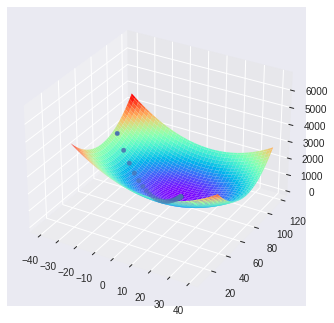

In [50]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

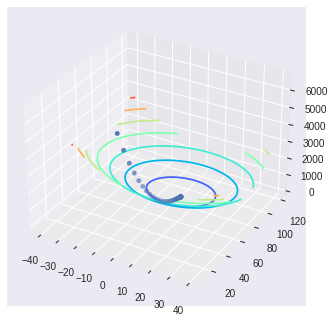

In [51]:
# visualization of path tracing using contoir plot
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

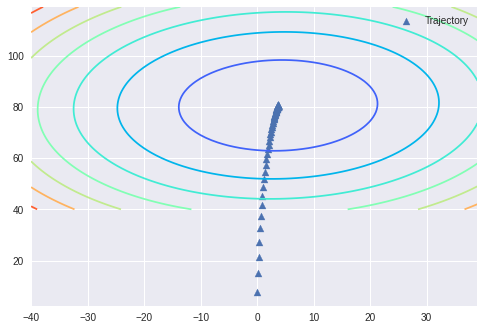

In [52]:
# 2D Contour Plot 
plt.contour(T0,T1,J,cmap='rainbow')
plt.scatter(theta_list[:,0],theta_list[:,1],marker='^',label='Trajectory')
plt.legend()
plt.show()

In [39]:
# Save the data in file
theta_list
np.save("ThetaList.npy",theta_list)

In [40]:
np.save?

### np.save
- np.save method saves a numpy array in a file with extension .npy

### np.load
- np.load() method loads numpy array saved in a .npy file.